In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kaustubhdikshit/neu-surface-defect-database

Dataset URL: https://www.kaggle.com/datasets/kaustubhdikshit/neu-surface-defect-database
License(s): unknown


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/neu-surface-defect-database.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_size = (200, 200)
batch_size = 16
num_classes = 6

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/NEU-DET/train/images',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/NEU-DET/train/images',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load ResNet50V2 without the top layers, using pretrained ImageNet weights
base_model = tf.keras.applications.ResNet50V2(
    input_shape=(img_size[0], img_size[1], 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model (no fine-tuning)
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Use 'sigmoid' for multi-label
])

# Compile the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model (fewer epochs)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Found 1152 images belonging to 6 classes.
Found 288 images belonging to 6 classes.
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.6199 - loss: 1.0892 - val_accuracy: 0.9722 - val_loss: 0.2498
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9581 - loss: 0.2455 - val_accuracy: 0.9861 - val_loss: 0.1373
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9773 - loss: 0.1482 - val_accuracy: 0.9861 - val_loss: 0.0939
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9636 - loss: 0.1251 - val_accuracy: 0.9861 - val_loss: 0.0835
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9830 - loss: 0.0880 - val_accuracy: 0.9931 - val_loss: 0.0665
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9803 - loss: 0.0780 - val_accuracy: 0.9931 - val_loss: 0.0566
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9862 - loss: 0.0749 - val_accuracy: 0.9931 - val_loss: 0.0510
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9945 - loss: 0.0530 - val_accuracy: 0.9931 - val_loss: 0

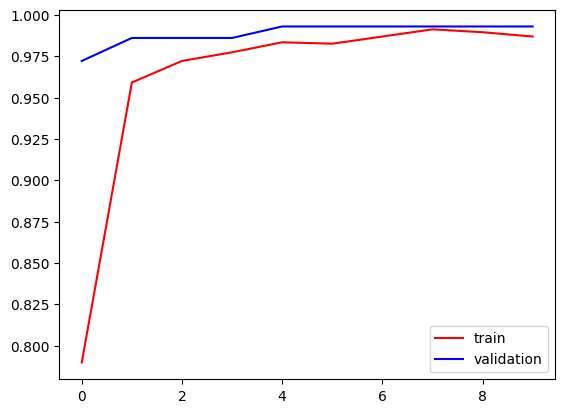

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

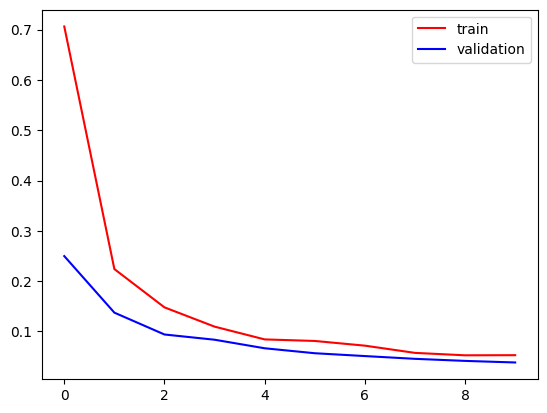

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [7]:
# Get a single batch from the generator
images, labels = next(train_data)

# Import required libraries for visualization
import matplotlib.pyplot as plt

# Get the first image from the batch (index 0)
image = images[10]

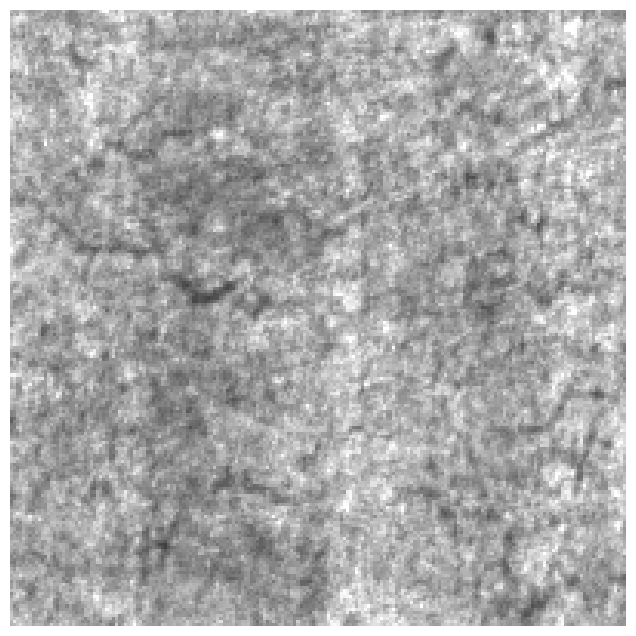

In [8]:
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
# If you want to see the corresponding label
print("Label:", labels[0])

Label: [0. 0. 1. 0. 0. 0.]


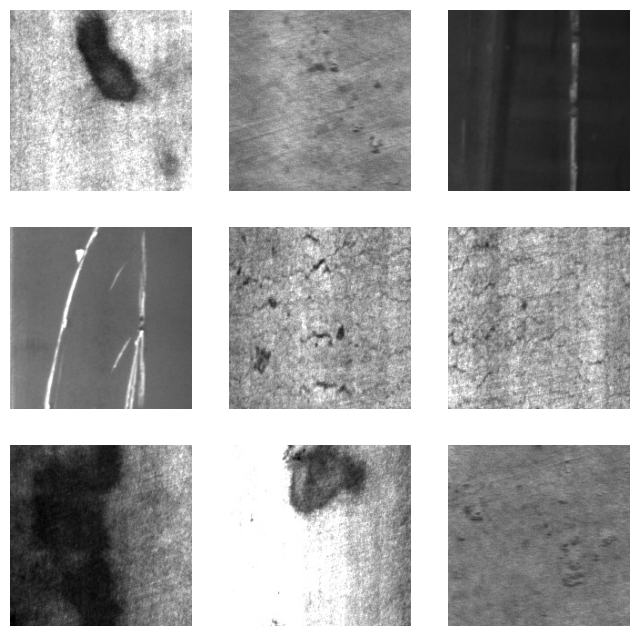

Class names: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [10]:
# To view multiple images from the batch
plt.figure(figsize=(8, 8))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# You can also get class names from the generator
class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)

In [11]:
import numpy as np
# First, let's see what we have
images, labels = next(val_data)
single_image = images[2]
input_image = np.expand_dims(single_image, axis=0)

# Make prediction
predictions = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [12]:
# Make prediction
predictions = model.predict(input_image)

# Let's print some debug information
print("Shape of predictions:", predictions.shape)
print("Predicted class index:", np.argmax(predictions[0]))

# Print the actual class_names
print("\nAvailable class names:")
print(train_data.class_indices)

# Now let's fix the visualization
predicted_class = np.argmax(predictions[0])
class_names = list(val_data.class_indices.keys())  # Get class names from data generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Shape of predictions: (1, 6)
Predicted class index: 4

Available class names:
{'crazing': 0, 'inclusion': 1, 'patches': 2, 'pitted_surface': 3, 'rolled-in_scale': 4, 'scratches': 5}


In [13]:
# Double check if the index is valid
print("\nNumber of classes:", len(class_names))
print("Predicted class index:", predicted_class)


Number of classes: 6
Predicted class index: 4


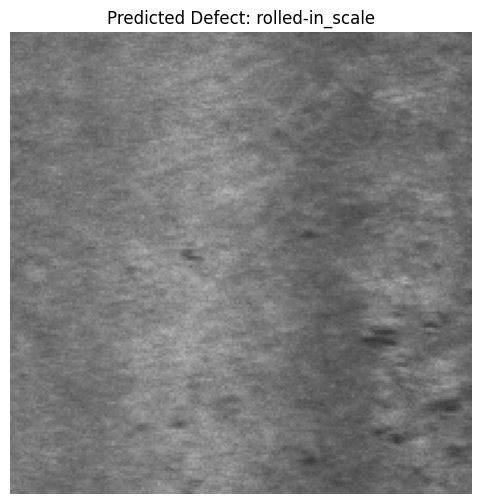

In [14]:
# Now display with verification
plt.figure(figsize=(6, 6))
plt.imshow(single_image)
if predicted_class < len(class_names):
    plt.title(f'Predicted Defect: {class_names[predicted_class]}')
else:
    plt.title(f'Predicted Class Index: {predicted_class} (Warning: Index out of range)')
plt.axis('off')
plt.show()

In [15]:
# Print all probabilities
for i, prob in enumerate(predictions[0]):
    if i < len(class_names):
        print(f'{class_names[i]}: {prob:.2%}')
    else:
        print(f'Class {i}: {prob:.2%}')

crazing: 0.12%
inclusion: 0.60%
patches: 0.18%
pitted_surface: 0.42%
rolled-in_scale: 98.53%
scratches: 0.15%


In [16]:
model.save('neu_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


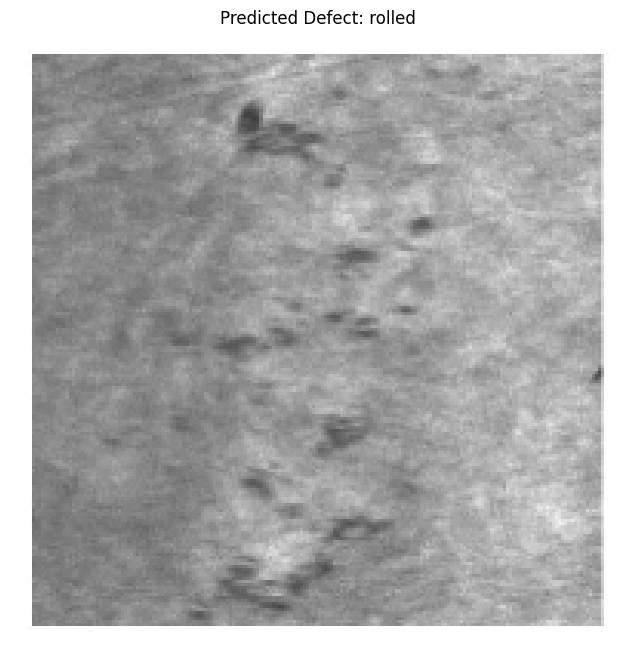


Prediction Probabilities:
crazing: 0.00%
inclusion: 0.02%
patches: 0.00%
pitted: 0.01%
rolled: 99.97%
scratches: 0.00%


In [18]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the saved model
model = load_model('/content/neu_model.keras')

# 2. Function to predict on a single image
def predict_defect(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))  # Use same size as training
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Same normalization as training
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Define class names - replace with your actual class names
    class_names = ['crazing', 'inclusion', 'patches', 'pitted', 'rolled', 'scratches']

    # Display image and prediction
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f'Predicted Defect: {class_names[predicted_class]}')
    plt.axis('off')
    plt.show()

    # Print probabilities for all classes
    print("\nPrediction Probabilities:")
    for i, probability in enumerate(predictions[0]):
        print(f'{class_names[i]}: {probability:.2%}')

# 3. Use the function
predict_defect('/content/Steel-surface-defect-image-a-Crazing-b-inclusions-c-patches-d-pitted-surface.png')

In [19]:
# Evaluate on validation data
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9901 - loss: 0.0420
Validation Loss: 0.0382
Validation Accuracy: 0.9931


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step
Classification Report:
                 precision    recall  f1-score   support

        crazing       0.19      0.19      0.19        48
      inclusion       0.20      0.21      0.21        48
        patches       0.19      0.19      0.19        48
 pitted_surface       0.06      0.06      0.06        48
rolled-in_scale       0.12      0.12      0.12        48
      scratches       0.15      0.15      0.15        48

       accuracy                           0.15       288
      macro avg       0.15      0.15      0.15       288
   weighted avg       0.15      0.15      0.15       288



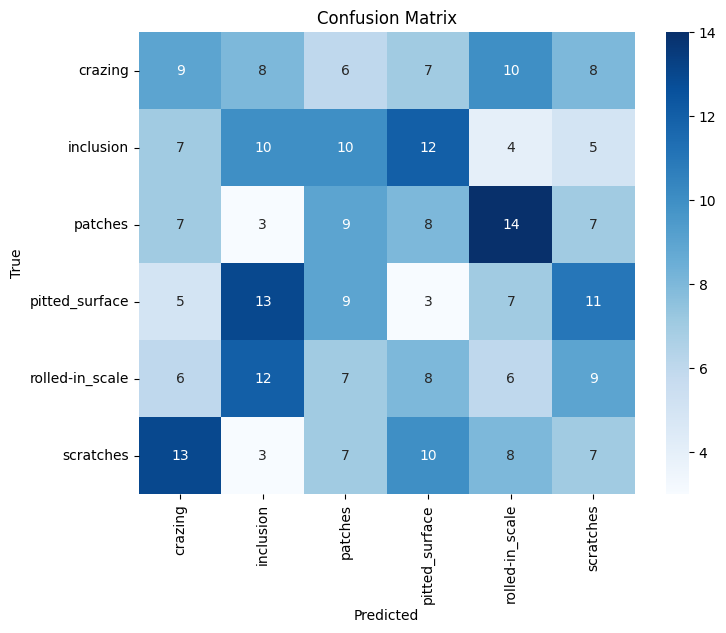

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Class labels
class_labels = list(val_data.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

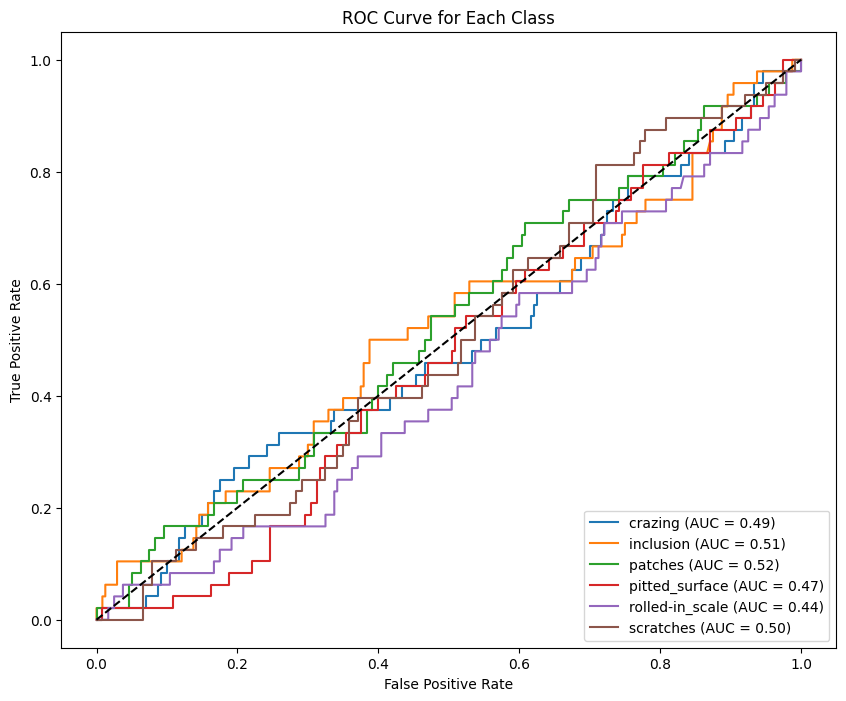

In [21]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_labels)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, recall, F1 (macro, micro, weighted)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"Macro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1-score: {f1_macro:.4f}")
print("")

print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Weighted F1-score: {f1_weighted:.4f}")

Macro Precision: 0.1528
Macro Recall: 0.1528
Macro F1-score: 0.1528

Weighted Precision: 0.1528
Weighted Recall: 0.1528
Weighted F1-score: 0.1528


Evaluating image Surface-defects-in-a-strip-after-hot-rolling.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


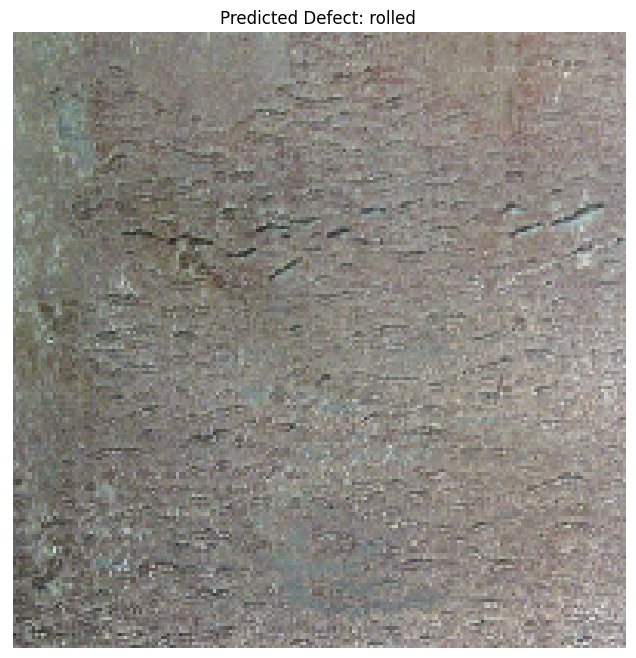


Prediction Probabilities:
crazing: 1.00%
inclusion: 8.05%
patches: 0.21%
pitted: 12.91%
rolled: 76.86%
scratches: 0.98%
Evaluating image Steel-surface-defect-image-a-Crazing-b-inclusions-c-patches-d-pitted-surface.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


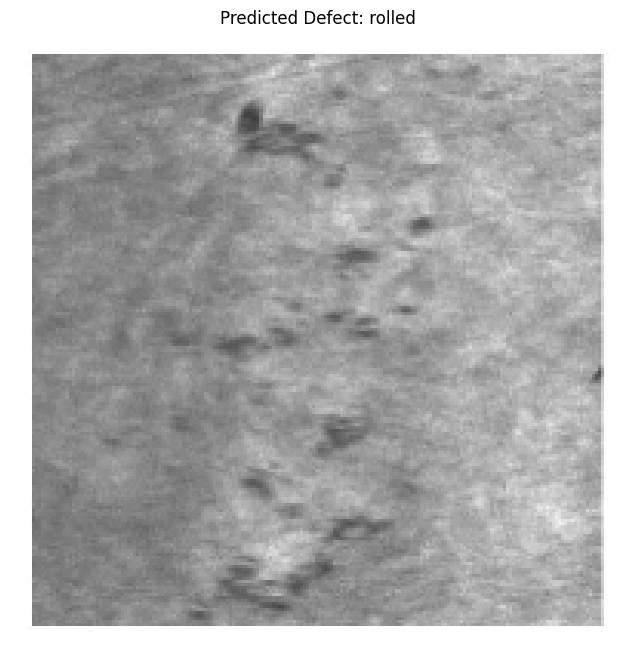


Prediction Probabilities:
crazing: 0.00%
inclusion: 0.02%
patches: 0.00%
pitted: 0.01%
rolled: 99.97%
scratches: 0.00%
Evaluating image 40747_2023_1180_Fig1_HTML.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


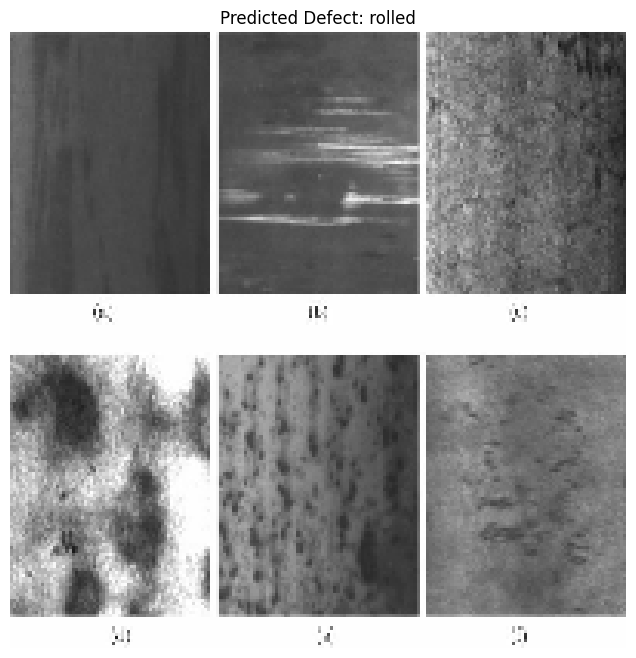


Prediction Probabilities:
crazing: 0.00%
inclusion: 2.80%
patches: 0.03%
pitted: 7.13%
rolled: 48.50%
scratches: 41.55%


In [23]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the saved model
model = load_model('/content/neu_model.keras')

# 2. Function to predict on a single image (same as before)
def predict_defect(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))  # Use same size as training
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Same normalization as training
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Define class names - replace with your actual class names
    class_names = ['crazing', 'inclusion', 'patches', 'pitted', 'rolled', 'scratches']

    # Display image and prediction
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f'Predicted Defect: {class_names[predicted_class]}')
    plt.axis('off')
    plt.show()

    # Print probabilities for all classes
    print("\nPrediction Probabilities:")
    for i, probability in enumerate(predictions[0]):
        print(f'{class_names[i]}: {probability:.2%}')


# 3. Evaluate the model on a folder of unseen data
unseen_data_dir = '/content/unseen data' # Replace with the actual path
# Example Usage
for filename in os.listdir(unseen_data_dir):
  if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
    image_path = os.path.join(unseen_data_dir, filename)
    print(f"Evaluating image {filename}")
    predict_defect(image_path)